# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại bệnh tiểu đường.
Phân tích này nhằm sử dụng biểu đồ cột để hiển thị top 10 mẫu có mức glucose cao nhất theo kết quả phân loại (Outcome: 0 - không bệnh, 1 - có bệnh), và so sánh với một đặc trưng khác (BMI).

## 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import stats

# Tải dữ liệu
df = pd.read_csv('diabetes.csv')
display.display(df.head())

# Sắp xếp theo Glucose giảm dần
sorted_df = df.sort_values('Glucose', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Nhận xét:**
+ Tập dữ liệu gồm 768 dòng và 9 cột, với 8 cột đặc trưng (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) và 1 cột mục tiêu (Outcome: 0 - không bệnh, 1 - có bệnh).
+ Tất cả các cột đều là kiểu số (int64 hoặc float64).
+ Sắp xếp theo Glucose để hiển thị top 10 mẫu có mức glucose cao nhất, vì Glucose có tương quan mạnh với Outcome (khoảng 0.47 từ ma trận tương quan).

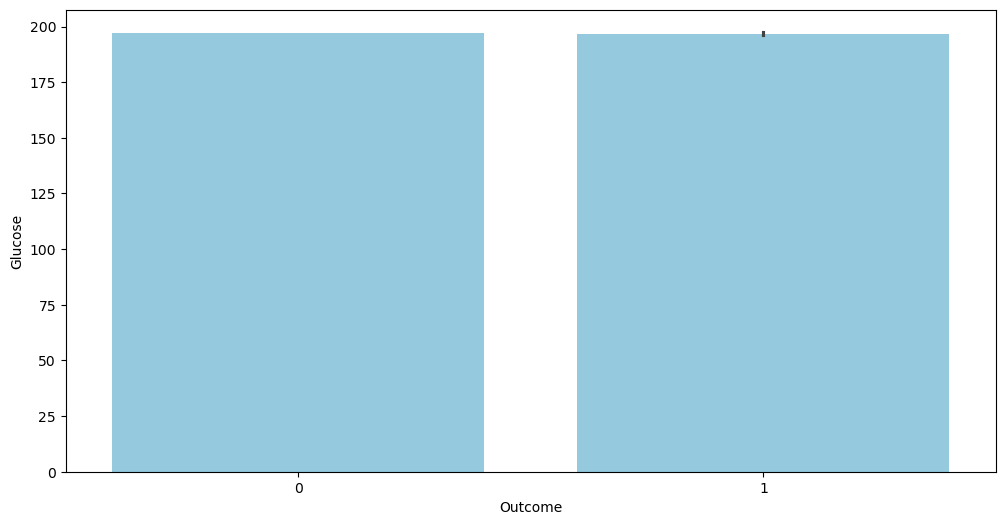

In [3]:
# Case 1: Basic
plt.figure(figsize=(12,6))
data = sorted_df.iloc[0:10]
sns.barplot(data=data, x='Outcome', y='Glucose', color='skyblue')
plt.show()

**Ý nghĩa:**
+ Trục x: Outcome (0 - không bệnh, 1 - có bệnh).
+ Trục y: Mức glucose của top 10 mẫu có glucose cao nhất.
+ Biểu đồ này cho thấy hầu hết top 10 glucose cao rơi vào Outcome=1 (có bệnh), phản ánh glucose cao là yếu tố rủi ro cho bệnh tiểu đường.

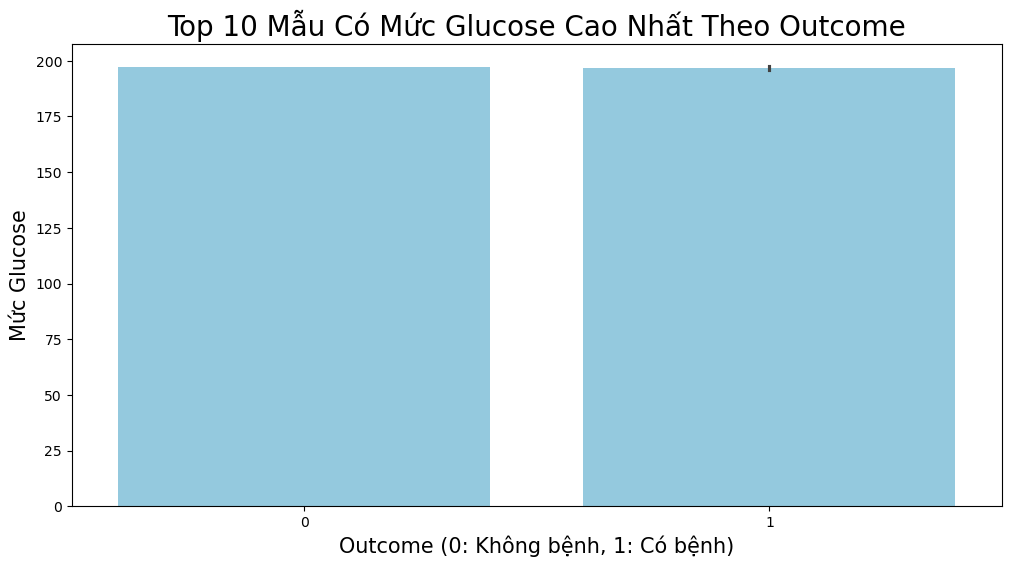

In [4]:
# Case 2: Advanced 1
plt.figure(figsize=(12,6))
data = sorted_df.iloc[0:10]
ax = sns.barplot(data=data, x='Outcome', y='Glucose', color='skyblue')
ax.set_xlabel('Outcome (0: Không bệnh, 1: Có bệnh)', fontsize=15)
ax.set_ylabel('Mức Glucose', fontsize=15)
ax.set_title('Top 10 Mẫu Có Mức Glucose Cao Nhất Theo Outcome', fontsize=20)
plt.show()

**Ý nghĩa:**
+ Tương tự Case 1, nhưng thêm tiêu đề và nhãn rõ ràng.
+ Hầu hết mẫu có glucose cao (>180) đều có Outcome=1, cho thấy glucose là chỉ số quan trọng để dự đoán bệnh.

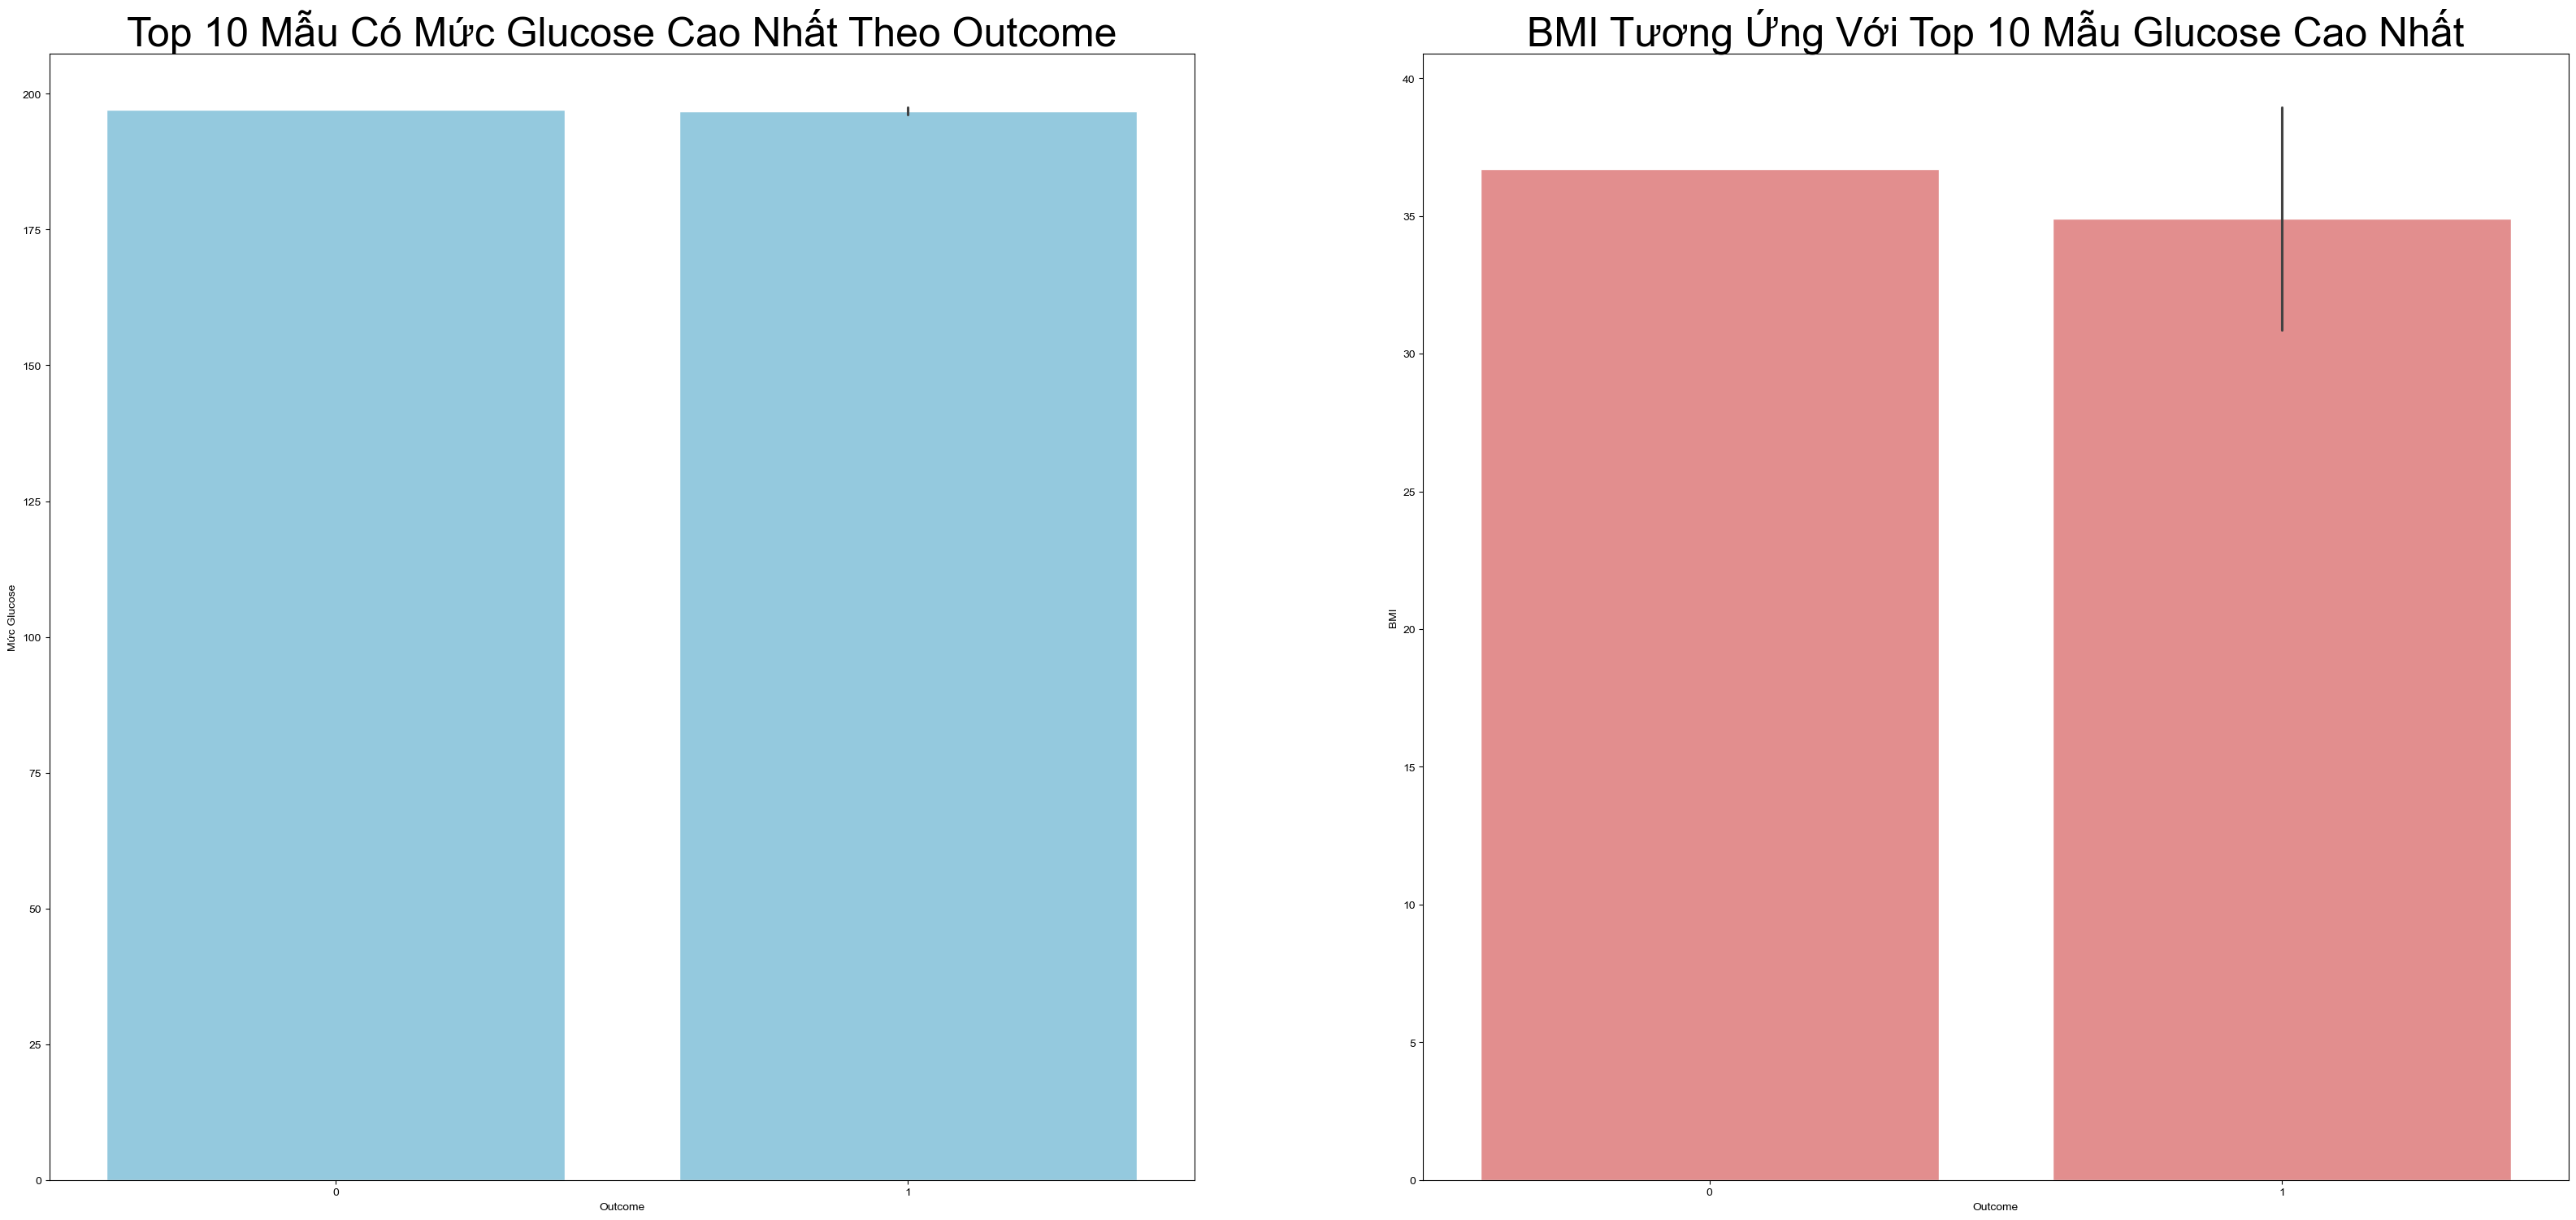

In [5]:
# Case 3: View multiple perspectives at once
fig, ax = plt.subplots(1, 2, figsize=(40,18))
data = sorted_df.iloc[0:10]
sns.set(font_scale=3)
ax1 = sns.barplot(data=data, x='Outcome', y='Glucose', ax=ax[0], color='skyblue')
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Mức Glucose')
ax1.set_title('Top 10 Mẫu Có Mức Glucose Cao Nhất Theo Outcome')
ax2 = sns.barplot(data=data, x='Outcome', y='BMI', ax=ax[1], color='lightcoral')
ax2.set_xlabel('Outcome')
ax2.set_ylabel('BMI')
ax2.set_title('BMI Tương Ứng Với Top 10 Mẫu Glucose Cao Nhất')
plt.show()

**Ý nghĩa:**
+ Biểu đồ trái: Glucose cao nhất theo Outcome, hầu hết là có bệnh (Outcome=1).
+ Biểu đồ phải: BMI tương ứng với các mẫu đó, cho thấy BMI cao cũng liên quan đến glucose cao và bệnh tiểu đường.
+ So sánh song song giúp thấy BMI và glucose đều là yếu tố rủi ro.